Se instalan aquellas dependencias necesarias:

In [29]:
%pip install ipywidgets
%pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Importamos las librerias necesarias para el análisis.

In [30]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [31]:
df = pd.read_csv("datos_rio.csv", sep=';')

Para poder observar mejor los datos:

In [32]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [33]:
df.head(5)

,orden,sitios,codigo,fecha,año,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,1,Canal Villanueva y Río Luján,TI001,22/2/2023,2023,Verano,26,24,6.59,7.24,Ausencia,Ausencia,Ausencia,Presencia,600,100,130,3.9,<0.05,0.26,<0.10,<2.0,<30,29,<0.10,<0.005,<0.001,0.87,<0.15,53,Muy deteriorada
1,2,Río Lujan y Arroyo Caraguatá,TI006,22/2/2023,2023,Verano,26.8,25,5.94,6.96,Ausencia,Ausencia,Ausencia,Presencia,1000,400,1.500,5.2,0.25,0.16,0.11,2.1,<30,24,<0.10,<0.005,<0.001,10.61,0.21,39,Extremadamente deteriorada
2,3,Canal Aliviador y Río Lujan,TI002,22/2/2023,2023,Verano,27.6,24,6.14,6.88,Ausencia,Ausencia,Ausencia,Presencia,2000,1000,100,3.5,2.2,0.41,0.36,4.1,<30,21,<0.10,<0.005,<0.001,16.87,2.98,35,Extremadamente deteriorada
3,4,Río Carapachay y Arroyo Gallo Fiambre,TI003,22/2/2023,2023,Verano,26.1,25,5.02,6.82,Ausencia,Ausencia,Ausencia,Presencia,6000,500,220,3.9,0.56,0.23,0.17,2.2,<30,28,<0.10,0.005,<0.001,10.89,<0.15,37,Extremadamente deteriorada
4,5,Río Reconquista y Río Lujan,TI004,22/2/2023,2023,Verano,25.9,24,5.28,6.69,Ausencia,Presencia,Ausencia,Presencia,15000,3200,560,4.3,1.5,0.44,0.25,3.3,<30,24,<0.10,<0.005,<0.001,8.57,<0.15,34,Extremadamente deteriorada


En las columnas: "nitrato_mg_l", "nh4_mg_l", "p_total_l_mg_l", "fosf_ortofos_mg_l", "dbo_mg_l", "dqo_mg_l", "hidr_deriv_petr_ug_l", "cr_total_mg_l", "cd_total_mg_l", "clorofila_a_ug_l" y "microcistina_ug_l" hay datos del estilo "<0.05" por lo tanto vamos a eliminar el < asi podemos tratarlos como números.

In [34]:
columns_to_convert = ["nitrato_mg_l", "nh4_mg_l", "p_total_l_mg_l", "fosf_ortofos_mg_l", "dbo_mg_l", "dqo_mg_l", "hidr_deriv_petr_ug_l", "cr_total_mg_l", "cd_total_mg_l", "clorofila_a_ug_l" , "microcistina_ug_l"]

In [35]:
def handle_less_or_greater_than(value):
    if isinstance(value, str):
        if value.startswith('<'):
            try:
                return float(value[1:])
            except ValueError:
                return np.nan
        elif value.startswith('>'):
            try:
                return float(value[1:])
            except ValueError:
                return np.nan
    return value
for column in columns_to_convert:
    df[column] = df[column].apply(handle_less_or_greater_than)

Se observa el % de datos nulos dentro del dataset.

In [36]:
total_rows = df.shape[0]
null_percentage_df = pd.DataFrame()
null_percentage_df = (df.isnull().sum() / total_rows*100 ).reset_index()
null_percentage_df.columns = ['Variables','%']
null_percentage_df

,Variables,%
0,orden,0.000000
1,sitios,0.000000
2,codigo,0.000000
3,fecha,0.000000
4,año,0.000000
5,campaña,0.000000
6,tem_agua,0.000000
7,tem_aire,0.000000
8,od,0.000000
9,ph,0.591716


Hay muchos datos que en vez de ser nulos directamente, aparecen con palabras del estilo: "no se midió","falto un frasco","no se pudo calcular". Por lo tanto, se los va a considerar como datos nulos también.

In [37]:
null_words = ["no se muestréo","no se muestreó","sin muestra","envase sin muestra","sin equipo","en obra","no se midió","falto un frasco","no se pudo calcular","no muestréo","no muestreó","inaccesible"]

def replace_with_nan(df, words):
    for word in words:
        df = df.applymap(lambda x: np.nan if isinstance(x, str) and word in x else x)
    return df

df = replace_with_nan(df, null_words)

C:\Users\Pc\AppData\Local\Temp\ipykernel_18380\2993214595.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if isinstance(x, str) and word in x else x)


Convertimos todos los tipos de datos correspondiente a numeros a int. Ya que como en el dataset anterior, son "object" la mayoria de ellos.

In [39]:
columns_to_convert = [
    'tem_agua', 'tem_aire', 'od', 'ph', 'colif_fecales_ufc_100ml',
    'escher_coli_ufc_100ml', 'enteroc_ufc_100ml', 'nitrato_mg_l', 'nh4_mg_l',
    'p_total_l_mg_l', 'fosf_ortofos_mg_l', 'dbo_mg_l', 'dqo_mg_l',
    'turbiedad_ntu','hidr_deriv_petr_ug_l', 'cr_total_mg_l','cd_total_mg_l',
    'clorofila_a_ug_l', 'microcistina_ug_l', 'ica'
]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')


In [40]:
df["fecha"] = pd.to_datetime(df["fecha"]).dt.date

C:\Users\Pc\AppData\Local\Temp\ipykernel_18380\2509139177.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["fecha"] = pd.to_datetime(df["fecha"]).dt.date


Ahora se ve más cantidad de nulos en el dataset.

In [41]:
total_rows = df.shape[0]
null_percentage_df = pd.DataFrame()
null_percentage_df = (df.isnull().sum() / total_rows*100 ).reset_index()
null_percentage_df.columns = ['Variables','%']
null_percentage_df

,Variables,%
0,orden,0.000000
1,sitios,0.000000
2,codigo,0.000000
3,fecha,0.000000
4,año,0.000000
5,campaña,0.000000
6,tem_agua,18.343195
7,tem_aire,15.976331
8,od,21.301775
9,ph,26.035503


En el siguiente gráfico se ven todos los datos faltantes. Para facilitar la predicción se eliminarán.

C:\Users\Pc\AppData\Local\Temp\ipykernel_18380\1781208138.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Variables',y = '%',data = null_percentage_df, palette = 'muted')


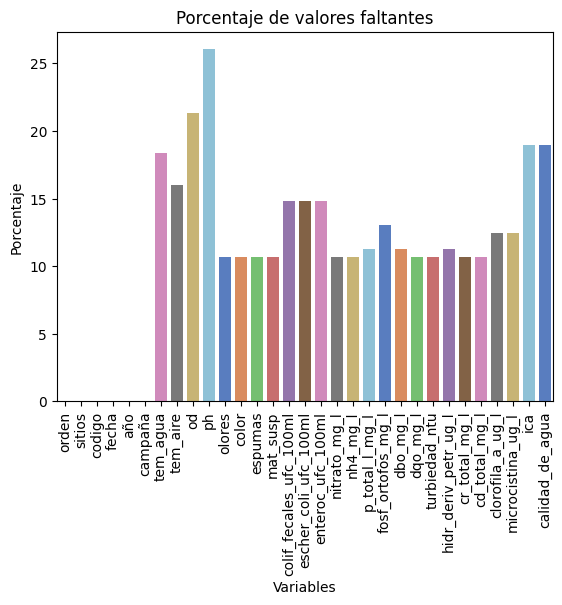

In [42]:
sns.barplot(x = 'Variables',y = '%',data = null_percentage_df, palette = 'muted')
plt.xticks(rotation=90)
plt.title("Porcentaje de valores faltantes")
plt.xlabel('Variables')
plt.ylabel('Porcentaje')
plt.show()

In [43]:
df = df.dropna()

In [44]:
df.dtypes

orden                        int64
sitios                      object
codigo                      object
fecha                       object
año                          int64
campaña                     object
tem_agua                   float64
tem_aire                   float64
od                         float64
ph                         float64
olores                      object
color                       object
espumas                     object
mat_susp                    object
colif_fecales_ufc_100ml    float64
escher_coli_ufc_100ml      float64
enteroc_ufc_100ml          float64
nitrato_mg_l               float64
nh4_mg_l                   float64
p_total_l_mg_l             float64
fosf_ortofos_mg_l          float64
dbo_mg_l                   float64
dqo_mg_l                   float64
turbiedad_ntu              float64
hidr_deriv_petr_ug_l       float64
cr_total_mg_l              float64
cd_total_mg_l              float64
clorofila_a_ug_l           float64
microcistina_ug_l   

Se observan algunos datos "object" todavia. Primero se los pasara a string y luego finalmente se hara dummie esa variable. Es decir, se va a crear una columna booleana por cada valor posible de la columna original.

In [45]:
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

Los siguientes datos no son de ninguna importancia ni tienen un peso importante para predecir. Por lo tanto, se los elimina.

In [46]:
df = df.drop(["fecha","codigo","orden"],axis=1)

In [47]:
df_dummies = pd.get_dummies(df, columns=df.select_dtypes(include='string').columns)

In [48]:
print("Cantidad de columnas antes:",df.shape[1])
print("Cantidad de columnas despues:",df_dummies.shape[1])
df_dummies

Cantidad de columnas antes: 28
Cantidad de columnas despues: 70


,año,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,sitios_Arroyo Abra Vieja y Santa Rosa,sitios_Arroyo El Gato,sitios_Arroyo Santo Domingo,sitios_Arroyo Sarandí,sitios_Balneario Municipal,sitios_Balneario Palo Blanco,sitios_Camping Eva Perón,sitios_Canal Aliviador y Río Lujan,sitios_Canal Villanueva y Río Luján,sitios_Club de Pescadores,sitios_Costa de Villa Domínico,sitios_Costa y Melo,sitios_Costanera Norte - Espigón Abanico,sitios_Diagonal 66 (descarga cloaca),sitios_Ensenada Prefectura Isla Santiago,sitios_Escollera de Propaneros,sitios_Espora 400 m,sitios_Náutico 400 m,sitios_Pejerrey Club 400 m,sitios_Playa Espigón de Pacheco,sitios_Playa La Bagliardi,sitios_Playa La Balandra,sitios_Polo Petroquímico Dock Sud,sitios_Puerto de Olivos Espigón,sitios_Reserva Barrio El Ceibo,sitios_Reserva Ecológica,sitios_Reserva Ecológica Costanera Sur - Playita,sitios_Rio Tigre 100m antes del Rio Luján,sitios_Río Capitán y Río San Antonio,sitios_Río Carapachay y Arroyo Gallo Fiambre,sitios_Río Lujan y Arroyo Caraguatá,sitios_Río Lujan y Canal San Fernando,sitios_Río Reconquista y Río Lujan,sitios_Toma de agua Club de Pesca,campaña_Verano,campaña_invierno,campaña_otoño,campaña_primavera,olores_Ausencia,olores_Presencia,color_Ausencia,color_Presencia,espumas_Ausencia,espumas_Presencia,mat_susp_Ausencia,mat_susp_Presencia,calidad_de_agua_Extremadamente deteriorada,calidad_de_agua_Muy deteriorada,calidad_de_agua_Muy deteriorada
0,2023,26.0,24.0,6.59,7.24,600.0,100.0,130.0,3.9,0.05,0.26,0.10,2.0,30.0,29.0,0.1,0.005,0.001,0.87,0.15,53.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,True
1,2023,26.8,25.0,5.94,6.96,1000.0,400.0,1.5,5.2,0.25,0.16,0.11,2.1,30.0,24.0,0.1,0.005,0.001,10.61,0.21,39.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,True,False,False
2,2023,27.6,24.0,6.14,6.88,2000.0,1000.0,100.0,3.5,2.20,0.41,0.36,4.1,30.0,21.0,0.1,0.005,0.001,16.87,2.98,35.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,True,False,False
3,2023,26.1,25.0,5.02,6.82,6000.0,500.0,220.0,3.9,0.56,0.23,0.17,2.2,30.0,28.0,0.1,0.005,0.001,10.89,0.15,37.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,True,False,False
4,2023,25.9,24.0,5.28,6.69,15000.0,3200.0,560.0,4.3,1.50,0.44,0.25,3.3,30.0,24.0,0.1,0.005,0.001,8.57,0.15,34.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2023,22.0,22.0,5.55,7.41,2400.0,1800.0,330.0,2.8,1.90,0.27,0.20,3.8,80.

Se utilizan solo las variables numericas para ver la correlación entre ellas.

In [49]:
df_numeric = df.select_dtypes(include=['number'])

In [50]:
corr_variables = df_numeric.corr()

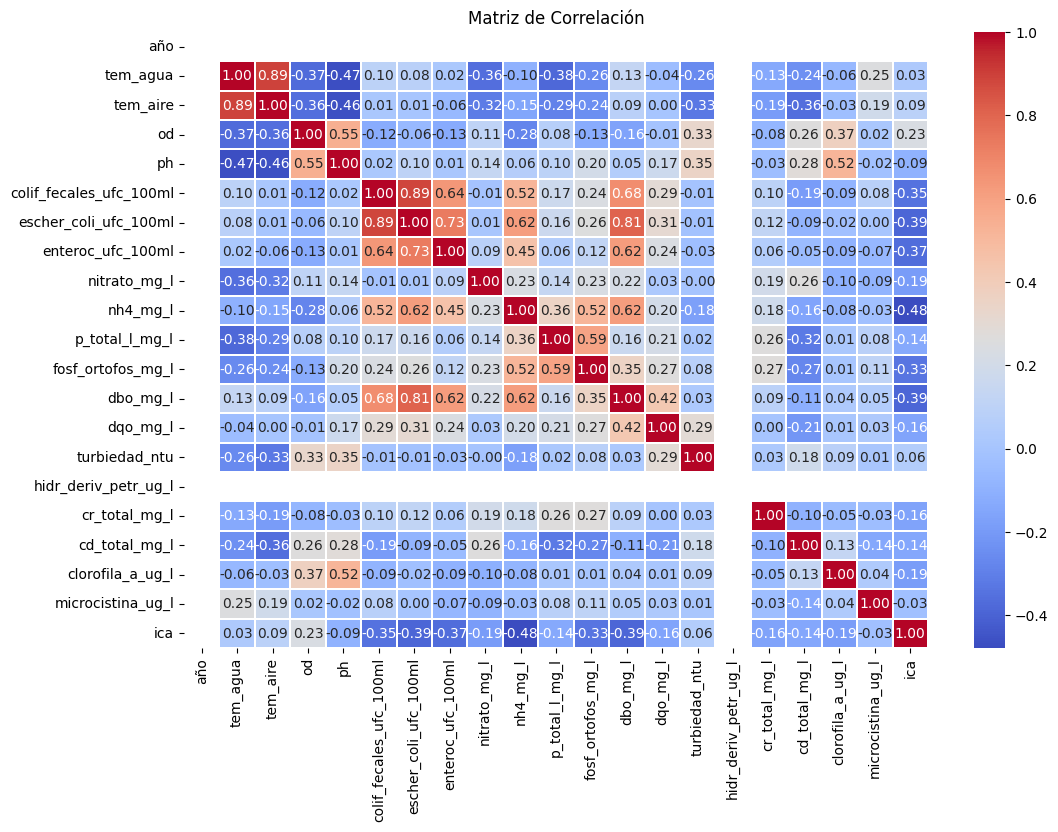

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_variables, annot=True, cmap='coolwarm', linewidths=0.1, fmt = ".2f" )
plt.title('Matriz de Correlación')
plt.show()

Acá se puede ver las variables que estan mas correlacionadas entre si.

In [54]:
corr_variables_top = df_numeric.corr()
corr_variables_top.reset_index()

unstacked_corr = corr_variables_top.unstack() #reshape
filtered_corr = unstacked_corr[unstacked_corr != 1.0]
sorted_corr = filtered_corr.abs().sort_values(ascending=False).reset_index()

sorted_corr.columns=['variable_1', 'variable_2', 'grado de correlación Pearson']
sorted_corr.head(10)

,variable_1,variable_2,grado de correlación Pearson
0,tem_agua,tem_aire,0.894478
1,tem_aire,tem_agua,0.894478
2,escher_coli_ufc_100ml,colif_fecales_ufc_100ml,0.887140
3,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,0.887140
4,escher_coli_ufc_100ml,dbo_mg_l,0.808999
5,dbo_mg_l,escher_coli_ufc_100ml,0.808999
6,enteroc_ufc_100ml,escher_coli_ufc_100ml,0.729732
7,escher_coli_ufc_100ml,enteroc_ufc_100ml,0.729732
8,dbo_mg_l,colif_fecales_ufc_100ml,0.675817
9,colif_fecales_ufc_100ml,dbo_mg_l,0.675817


Ahora dividimos el set de datos en un df para entrenar y otro para predecir. Se va a testear el modelo con un 20% del dataset original. Como columna a predecir va a quedar "ica", el índice de calidad del agua.

In [55]:
target_name = "ica"
Y = df_dummies[target_name]
X = df_dummies.drop([target_name],axis=1)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Predicción

Ahora se va a entrenar y predecir con dos modelos simples. El primero es el DecisionTreeClasifier. Donde cada rama del arbol corresponde a uno de los posibles valores para cada atributo.

In [57]:
tree_model = tree.DecisionTreeClassifier(max_depth = 20,
                                         min_samples_leaf = 15)

model = tree_model.fit(X = x_train, y = y_train)

In [58]:
y_pred = model.predict(x_test)
y_pred

array([37., 40., 40., 40., 40., 40., 37., 37., 37., 40., 37., 37., 39.,
       39., 40., 37., 37., 39.])

In [59]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 13.61111111111111
Root Mean Squared Error (RMSE): 3.689323936863109


El segundo es un modelo de regresión lineal que lo que hace es predecir en base a una linea recta trazada diagonalmente en un eje cartesiano y la correlación de los datos (puntos en el gráfico) entre si y con la recta.

In [60]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred = model.predict(x_test)
y_pred

array([45.8734394 , 41.95764487, 63.8747905 , 54.69324055, 32.84110582,
       40.25594592, 42.33126952, 32.19062418, 35.21660863, 42.44502007,
       43.50033907, 38.83167522, 46.92644454, 40.75933985, 37.90997846,
       40.19084918, 33.24220115, 35.64446208])

In [62]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 58.92995551053629
Root Mean Squared Error (RMSE): 7.676584885907032


Como resultados se obtuvo en el árbol de decisión un RMSE de 3.689323936863109 y en el modelo de regresión logistica un RMSE de 7.676584885907032. Este tipo de medición nos sirve para interpretar en las mismas unidades que la variable que esta prediciendo. Mientras más bajo sea el valor de RMSE, mejor será el rendimiento del modelo en términos de precisión de las predicciones. Por lo tanto puedo determinar que en la comparación entre estos dos modelos simple, el *árbol de decisión* predijo mejor.